# DESCRIPTIVE STATISTICS - VISUALIZATION

In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'PiYG',
    'axes.linewidth': 0.25,
    'axes.grid': False,
    'savefig.dpi': 400,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'axes.facecolor': 'white',
    'xtick.major.size': 2,
    'ytick.major.width': 0.25,
    'ytick.major.size': 2,
    'xtick.major.width': 0.25,
    'xtick.major.pad': '4',
    'ytick.major.pad': '4',
    'xtick.minor.size': 2,
    'ytick.minor.width': 0.25,
    'ytick.minor.size': 2,
    'xtick.minor.width': 0.25,
    'font.size': 7, 
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'lines.linewidth': 0.25,
    'patch.linewidth': 0.25,
    'figure.figsize': [7, 7],
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial'
}
matplotlib.rcParams.update(params)

## 1 MATCHES BY DAY AND MATCHES BY PLAYER

In [18]:
# Count the number of matches by date 
mids_by_date = pd.read_csv("data/general_stats/mids_by_date.csv")
mids_by_date['m_date'] = pd.to_datetime(mids_by_date['m_date'], format='%Y-%m-%d')
mids_by_date['day'] = mids_by_date['m_date'].dt.dayofweek
days = {0:'M', 1:'T', 2:'W', 3:'T', 4:'F', 5:'S', 6:'S'}
mids_by_date['day'] = mids_by_date['day'].apply(lambda x: days[x])
mids_by_date = mids_by_date.sort_values(['m_date'])
mids_by_date.set_index(['m_date'], inplace=True)
print(mids_by_date)

            num_of_mids day
m_date                     
2019-03-01        48886   F
2019-03-02        48995   S
2019-03-03        45696   S
2019-03-04        33555   M
2019-03-05        30504   T
2019-03-06        30434   W
2019-03-07        31267   T
2019-03-08        36469   F
2019-03-09        50479   S
2019-03-10        46290   S
2019-03-11        29363   M
2019-03-12        29157   T
2019-03-13        29009   W
2019-03-14        29890   T
2019-03-15        37090   F
2019-03-16        50550   S
2019-03-17        45816   S
2019-03-18        29833   M
2019-03-19        29523   T
2019-03-20        29240   W
2019-03-21        31193   T
2019-03-22        36154   F
2019-03-23        50375   S
2019-03-24        45624   S
2019-03-25        29115   M
2019-03-26        27491   T
2019-03-27        29446   W
2019-03-28        24271   T
2019-03-29        36189   F
2019-03-30        49550   S
2019-03-31        45487   S


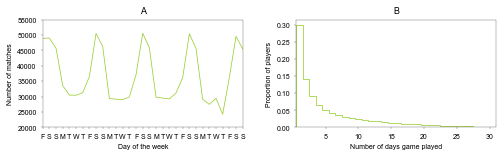

In [19]:
# Plot weekly cycle and number of days playing game
fig, ax = plt.subplots(1, 2, figsize=(7, 2.2))
mids_by_date.plot(ax=ax[0], c='yellowgreen', lw=0.75)
ax[0].set_xticks(mids_by_date.index)
ax[0].set_xticklabels(mids_by_date["day"].values)
ax[0].get_legend().remove()
ax[0].set_ylim(ymin=20000, ymax=55000)
ax[0].set_xlabel("Day of the week")
ax[0].set_ylabel("Number of matches")
ax[0].set_title("A")

# Plot the distribution of days players played the game
bins = np.arange(0, days_df['days'].max() + 1.5) - 0.5
days_df.hist(ax=ax[1], column='days', histtype='step', 
             weights=np.zeros_like(days_df['days'])+1./len(days_df['days']), 
             bins=bins, grid=False, color='yellowgreen', lw=0.75)
ax[1].set_xlim(xmin=0.5, xmax=31)
ax[1].set_xlabel("Number of days game played")
ax[1].set_ylabel("Proportion of players")
ax[1].set_title("B")
plt.tight_layout(w_pad=3)
plt.show()
fig.savefig('figs/paper/fig_s4.pdf', format='pdf')

## 2 STATS FOR CHEATERS VS. NON-CHEATERS

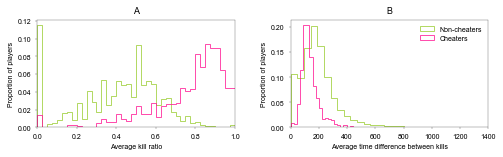

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.2))

### Plot a histogram of the average kill ratio for players

# Read the average kill ratio for cheaters.
cheater_kill_ratio = pd.read_csv("data/cheater_analysis/c_avg_kill_ratio.csv")
# Read the average kill ratio for non-cheaters.
non_cheater_kill_ratio = pd.read_csv("data/cheater_analysis/nc_avg_kill_ratio.csv")


non_cheater_kill_ratio.hist(column='avg_kill_ratio', histtype='step', edgecolor='yellowgreen', lw=0.75, 
                            bins=40, label='Non-cheaters', grid = False, ax=ax[0],
                            weights=np.zeros_like(non_cheater_kill_ratio['avg_kill_ratio']) + 1. / len(non_cheater_kill_ratio['avg_kill_ratio']))
cheater_kill_ratio.hist(column='avg_kill_ratio', histtype='step', edgecolor='deeppink', lw=0.75, 
                        bins=40, label='Cheaters', grid = False, ax=ax[0],
                        weights=np.zeros_like(cheater_kill_ratio['avg_kill_ratio']) + 1. / len(cheater_kill_ratio['avg_kill_ratio']))
ax[0].set_title('A')
ax[0].set_xlim(0, 1)
ax[0].set_xlabel('Average kill ratio')
ax[0].set_ylabel('Proportion of players')


### Plot a histogram of the average time difference between consecutive kills

# Read the average kill interval for cheaters.
cheater_kill_interval = pd.read_csv("data/cheater_analysis/c_avg_kill_interval.csv")
# Read the average kill interval for non-cheaters.
non_cheater_kill_interval = pd.read_csv("data/cheater_analysis/nc_avg_kill_interval.csv")

# Plot the histograms of cheaters and non-cheaters together.
non_cheater_kill_interval.hist(column='delta', histtype='step', edgecolor='yellowgreen', lw=0.75, 
                               bins=40, label='Non-cheaters', grid = False, ax=ax[1], 
                               weights=np.zeros_like(non_cheater_kill_interval['delta']) + 1. / len(non_cheater_kill_interval['delta']))
cheater_kill_interval.hist(column='delta', histtype='step', edgecolor='deeppink', lw=0.75, 
                           bins=40, label='Cheaters', grid = False, ax=ax[1], 
                           weights=np.zeros_like(cheater_kill_interval['delta']) + 1. / len(cheater_kill_interval['delta']))
ax[1].set_title('B')
ax[1].set_xlabel('Average time difference between kills')
ax[1].set_ylabel('Proportion of players')
ax[1].set_xlim(0, 1400) # Exclude outliers.
ax[1].legend(loc='upper right', frameon=False)

plt.tight_layout(w_pad=3)
plt.savefig('figs/paper/fig_s2.pdf', format='pdf')
plt.show()

## 3 ESTIMATED PERIOD OF CHEATING

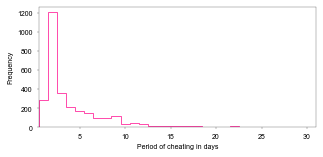

In [23]:
# Plot the distribution of the period of cheating.
# The plot contains cheaters who have full performance information.
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.2))
bins = np.arange(0, estim['period'].max() + 1.5) - 0.5
estim.hist(bins = bins, histtype='step', edgecolor='deeppink', lw=0.75, grid=False, ax=ax)
ax.set_title('')
ax.set_xlim(0.5, 31)
ax.set_xlabel('Period of cheating in days')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('figs/paper/fig_s3.pdf', format='pdf')
plt.show()